In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/multi

In [ ]:
!ls

In [ ]:
mkdir templates

In [ ]:
%%writefile templates/home.html

<h1> [배추값 예상에 필요한 값 입력] </h1>

<form action="/" method="post">
	<label >평균기온</label>
	<input type="text" name="avg_temp">
		
	<label >최고기온</label>
	<input type="text" name="max_temp">
	
	<label >최저기온</label>
	<input type="text" name="min_temp">

  <label >강수량평균</label>
	<input type="text" name="rain_fail">
	
	<p> <button style="font-family: 'Nanum Barun Gothic' !important;" type="submit" >예측하기</button> </p> 
</form>
	
	
<h2> [예측 결과]</h2>
	{% if price %}
	<h3 >예측된 가격은 {{ price }}원입니다.</h3>
    {% endif %}

In [ ]:
!pip install flask-ngrok

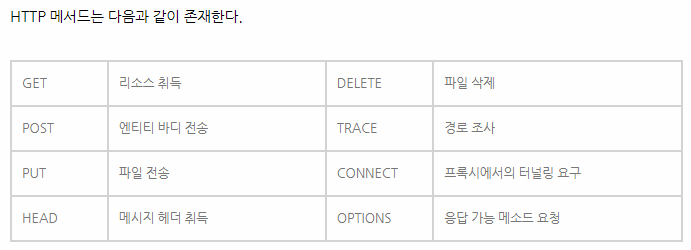

In [ ]:
from flask import Flask,render_template,url_for,request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)  # 플라스크 애플리케이션을 생성하는 코드, __name__==> 현재실행중인 파일명
run_with_ngrok(app)

@app.route("/")  #특정 주소에 접속하면 바로 다음 줄에 있는 함수를 호출하는 플라스크의 데코레이터

def index():
    return render_template('home_img.html')

app.run()

In [ ]:
# 코렙에서 돌리는 플라스크
from flask import Flask,render_template,url_for,request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)  # 플라스크 애플리케이션을 생성하는 코드, __name__==> 현재실행중인 파일명
run_with_ngrok(app)

@app.route("/", methods=['GET','POST'])   # 특정 주소에 접속하면 바로 다음 줄에 있는 함수를 호출하는 플라스크의 데코레이터

def index():
    if request.method=='GET':
        return render_template('home.html')
    
    if request.method=='POST':
        price= float(request.form['avg_temp']) + float(request.form['max_temp'])
        return render_template('home.html', price=price)

app.run()